In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('train.csv')
df = data.copy()
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
splitter = lambda x: x.split(' ')[1]
df['Time_taken'] = df['Time_taken(min)'].apply(splitter)

df.drop('Time_taken(min)',axis = 1, inplace = True)

In [6]:
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')


In [7]:
categoricals.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37,4.9,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,Snack,scooter,1,No,Metropolitian,30


In [8]:
for i in categoricals[['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken']].columns:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

cats = df.select_dtypes(include = ['object', 'category'])
nums = df.select_dtypes(include = 'number')

cats.head()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0x4607,INDORES13DEL02,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,Snack,motorcycle,No,Urban
1,0xb379,BANGRES18DEL02,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,Snack,scooter,No,Metropolitian
2,0x5d6d,BANGRES19DEL01,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,No,Urban
3,0x7a6a,COIMBRES13DEL02,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,Buffet,motorcycle,No,Metropolitian
4,0x70a2,CHENRES12DEL01,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,Snack,scooter,No,Metropolitian


In [9]:
df.dropna(inplace = True)
df.drop(['ID','Delivery_person_ID'], axis = 1, inplace = True)
df.shape

(42752, 18)

In [10]:
def transformer(dataframe):
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    scaler = StandardScaler()
    encoder = LabelEncoder()

    for i in dataframe.columns:
        if dataframe[i].dtypes != 'O':
            dataframe[i] = scaler.fit_transform(dataframe[[i]])
        else:
            dataframe[i] = encoder.fit_transform(dataframe[i])
    return dataframe
dx = df.copy()
df = transformer(df.drop('Time_taken',axis = 1))
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,1.275251,0.795166,0.712988,0.242788,0.722630,0.239808,32,38,46,5,0,1.212614,3,2,-1.298022,1,3
1,0.759544,-0.396374,-0.555814,0.326340,-0.602920,0.329880,37,129,143,4,1,1.212614,3,3,0.447866,1,0
2,-1.131382,-0.694259,-0.555657,0.326114,-0.619115,0.323964,32,5,10,3,2,-1.222353,1,2,0.447866,1,3
3,1.447153,0.199396,-0.802215,0.293365,-0.874161,0.292598,9,110,123,5,3,-1.222353,0,2,0.447866,1,0
4,0.415739,-0.098489,-0.548104,0.446097,-0.607044,0.447246,38,60,70,0,0,-0.004870,3,3,0.447866,1,0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

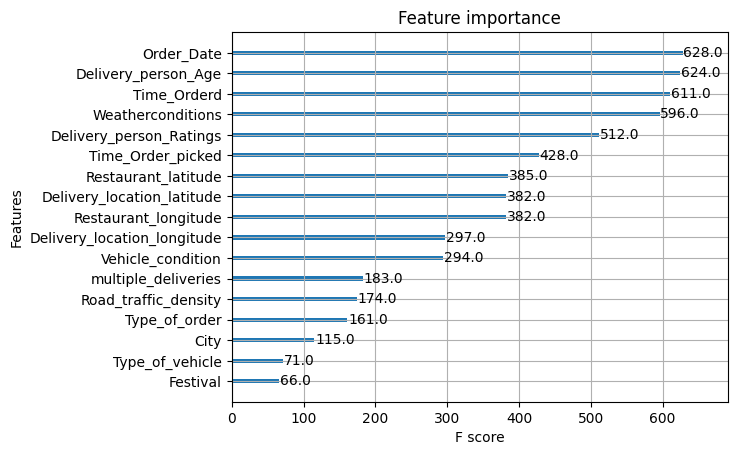

In [11]:
x = df
y = dx.Time_taken

# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [12]:
sel_cols = ['Delivery_person_Age','Order_Date', 'Weatherconditions', 'Time_Order_picked', 'Time_Orderd','Vehicle_condition','Type_of_vehicle','Type_of_order','Road_traffic_density','multiple_deliveries','Delivery_location_latitude','Delivery_location_longitude','Restaurant_latitude','Restaurant_longitude']
df = df[sel_cols]
df.head()

,Delivery_person_Age,Order_Date,Weatherconditions,Time_Order_picked,Time_Orderd,Vehicle_condition,Type_of_vehicle,Type_of_order,Road_traffic_density,multiple_deliveries,Delivery_location_latitude,Delivery_location_longitude,Restaurant_latitude,Restaurant_longitude
0,1.275251,32,5,46,38,1.212614,2,3,0,-1.298022,0.722630,0.239808,0.712988,0.242788
1,0.759544,37,4,143,129,1.212614,3,3,1,0.447866,-0.602920,0.329880,-0.555814,0.326340
2,-1.131382,32,3,10,5,-1.222353,2,1,2,0.447866,-0.619115,0.323964,-0.555657,0.326114
3,1.447153,9,5,123,110,-1.222353,2,0,3,0.447866,-0.874161,0.292598,-0.802215,0.293365
4,0.415739,38,0,70,60,-0.004870,3,3,0,0.447866,-0.607044,0.447246,-0.548104,0.446097


In [13]:
x = df
y = dx.Time_taken

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

In [18]:
# Modelling
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

model = XGBRegressor()
model.fit(xtrain, ytrain)
cross_validation = model.predict(xtrain)
print(r2_score(cross_validation, ytrain))

0.7736758422604074


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
cross_validation = rf_model.predict(xtrain)
print(r2_score(cross_validation, ytrain))

0.951997764926975


In [21]:
cross_validation = model.predict(xtest)
print(f'XGBOOST MODEL TEST: {r2_score(cross_validation, ytest)}')

cross_validation = rf_model.predict(xtest)
print(f'RANDOMFOREST  MODEL TEST: {r2_score(cross_validation, ytest)}')

XGBOOST MODEL TEST: 0.6675364752390535
RANDOMFOREST  MODEL TEST: 0.5962100512330433


In [26]:
from lightgbm import LGBMRegressor

lgm_model = LGBMRegressor()
lgm_model.fit(xtrain, ytrain)
cross_validation = lgm_model.predict(xtrain)
print(r2_score(cross_validation, ytrain))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1485
[LightGBM] [Info] Number of data points in the train set: 34201, number of used features: 14
[LightGBM] [Info] Start training from score 26.367124
0.6748033471276798


In [28]:
cross_validation = lgm_model.predict(xtest)
print(f'LGBM  MODEL TEST: {r2_score(cross_validation, ytest)}')

LGBM  MODEL TEST: 0.6453234291826601



<!-- COLUMN MEANING -->

ID: Unique identifier for each delivery record.

Delivery_person_ID: Unique identifier for each delivery person.

Delivery_person_Age: Age of the delivery person.

Delivery_person_Ratings: Ratings assigned to the delivery person, reflecting their performance.

Restaurant_latitude: Latitude coordinates of the restaurant where the order originated.

Restaurant_longitude: Longitude coordinates of the restaurant where the order originated.

Delivery_location_latitude: Latitude coordinates of the delivery location.

Delivery_location_longitude: Longitude coordinates of the delivery location.

Order_Date: Date when the order was placed.

Time_Ordered: Time when the order was placed.

Time_Order_picked: Time when the delivery person picked up the order.

Weatherconditions: Weather conditions at the time of delivery.

Road_traffic_density: Level of traffic density on the roads during the delivery.

Vehicle_condition: Condition of the delivery vehicle.

Type_of_order: Category or type of the order (e.g., dine-in, takeout, delivery).

Type_of_vehicle: Type of vehicle used for delivery (e.g., bike, car).

multiple_deliveries: Indicates whether the delivery involves multiple orders.

Festival: Whether there is a festival or special occasion affecting the delivery.

City: City where the delivery is taking place.

Time_taken(min): The time taken to complete the delivery in minutes (target variable).